In [2]:
# Created by Emille Ishida on 03/09/2025
# modified by Phelipe Darc on 04/09/2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
from collections import Counter

# [Data Import] Galactic crossmatch catalog

In [3]:
# read results of xmatch
data = pd.read_parquet('/media3/CRP8/TDE/data/xmatch/galactic/')

In [4]:
data.shape

(3295444, 10)

In [5]:
np.unique(data['finkclass'].values)

array(['**', '**_Candidate', 'AGB*', 'AGB*_Candidate', 'AGN',
       'AGN_Candidate', 'Ae*', 'Ae*_Candidate', 'Assoc*', 'BClG', 'BLLac',
       'BSS_Candidate', 'BYDra', 'BYDraV*', 'Be*', 'Be*_Candidate',
       'Blazar', 'Blend', 'Blue', 'BlueStraggler',
       'BlueStraggler_Candidate', 'Bubble', 'C*', 'C*_Candidate',
       'CV*_Candidate', 'Candidate_AGB*', 'Candidate_Ae*', 'Candidate_C*',
       'Candidate_CV*', 'Candidate_Cepheid', 'Candidate_EB*',
       'Candidate_HB*', 'Candidate_LP*', 'Candidate_RGB*',
       'Candidate_RRLyr', 'Candidate_TTau*', 'Candidate_WD*',
       'Candidate_YSO', 'Candidate_brownD*', 'Candidate_low-mass*',
       'CataclyV*', 'CataclyV*_Candidate', 'Cepheid', 'Cepheid_Candidate',
       'ChemPec*', 'Cl*', 'ClG', 'ClassicalCep', 'Cloud', 'Compact_Gr_G',
       'DkNeb', 'EB*', 'EB*_Candidate', 'EclBin', 'EclBin_Candidate',
       'El*_Candidate', 'EllipVar', 'Em*', 'EmG', 'EmLine*', 'EmObj',
       'Eruptive*', 'FIR', 'GinCl', 'GinGroup', 'GlCl', 'GlCl?_

In [6]:
data_obj = data.groupby('objectId', sort=False, as_index=False).agg(list)
data_obj.shape

(88594, 10)

In [7]:
data_obj['cat_id']

0        [Hunt_ReffertOCmembers_507696, Hunt_ReffertOCm...
1        [Hunt_ReffertOCmembers_527711, Hunt_ReffertOCm...
2        [Hunt_ReffertOCmembers_527346, Hunt_ReffertOCm...
3        [Hunt_ReffertOCmembers_527315, Hunt_ReffertOCm...
4        [Hunt_ReffertOCmembers_520018, Hunt_ReffertOCm...
                               ...                        
88589                                     [NGC_4372_11411]
88590                                     [NGC_4372_22344]
88591                                      [NGC_4372_3848]
88592                                      [NGC_4372_1288]
88593                                     [NGC_4372_29297]
Name: cat_id, Length: 88594, dtype: object

In [9]:
data_obj['n_g'] = [sum(np.array(item) == 1) for item in data_obj['fid']]
data_obj['n_r'] = [sum(np.array(item) == 2) for item in data_obj['fid']]

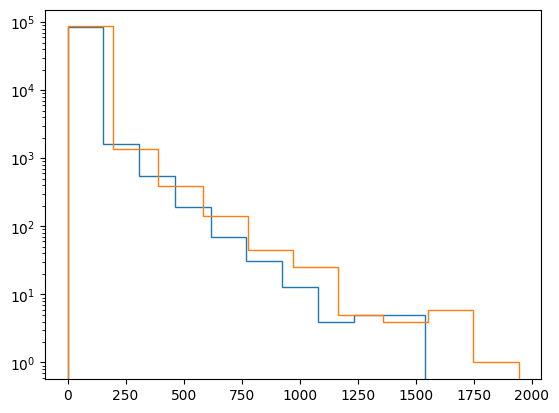

In [10]:
import matplotlib.pyplot as plt
plt.hist(data_obj['n_g'], log=True, histtype='step')
plt.hist(data_obj['n_r'], log=True, histtype='step')
plt.show()

# [cut1] keep only light curves with a minimum of 3 points 
(less than that it is a straight line)

In [11]:
flag_points = np.logical_or(data_obj['n_g'] > 3, data_obj['n_r'] > 3)
data_use = data_obj[flag_points]

In [12]:
data_use.shape, data_obj.shape

((40886, 12), (88594, 12))

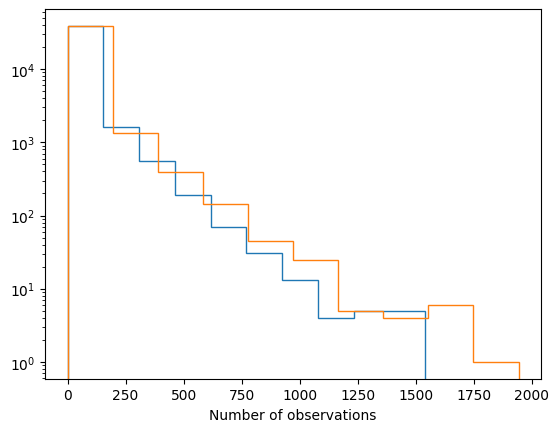

In [13]:
plt.hist(data_use['n_g'], log=True, histtype='step',label='n_g')
plt.hist(data_use['n_r'], log=True, histtype='step',label='n_r')
plt.xlabel('Number of observations')
plt.show()

In [14]:
classes = np.unique(data['finkclass'].values)

data_use2 = deepcopy(data_use)
data_use2['top_class'] = [np.unique(data_use['finkclass'].values[i]) for i in range(data_use.shape[0])]

# average position
data_use2['mean_ra'] = [np.mean(data_use.iloc[i]['ra']) for i in range(data_use.shape[0])]
data_use2['mean_dec'] = [np.mean(data_use.iloc[i]['dec']) for i in range(data_use.shape[0])]

In [15]:
#data_use2[['objectId', 'mean_ra', 'mean_dec']].to_csv('galactic_find_DR_photometry.csv', index=False)

### [CUT 02] Apply the 3/2σ cut for each object

In [18]:
data_use

,objectId,finkclass,candid,dec,fid,jd,ra,sigmapsf,magpsf,cat_id,n_g,n_r
0,ZTF18aabvmsf,"[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[1604295091715010000, 1542359651715010000, 120...","[18.8299791, 18.8299247, 18.8299635, 18.829948...","[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[2459358.7950926, 2459296.8596528, 2458955.783...","[182.8329942, 182.8330448, 182.833049, 182.833...","[0.06257119029760361, 0.06367256492376328, 0.0...","[18.127302169799805, 18.14103889465332, 17.997...","[Hunt_ReffertOCmembers_507696, Hunt_ReffertOCm...",248,184
1,ZTF18aaajkrz,"[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[1516371492915010045, 1970254601615015022, 129...","[18.2771514, 18.2771769, 18.2771373, 18.277069...","[2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, ...","[2459270.8714931, 2459724.7546065, 2459045.737...","[198.1754886, 198.1755048, 198.175503, 198.175...","[0.11345422267913818, 0.048118770122528076, 0....","[18.365882873535156, 18.065889358520508, 17.12...","[Hunt_ReffertOCmembers_527711, Hunt_ReffertOCm...",566,656
2,ZTF18abciamu,"[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[1970254601615010031, 1970290892915015019, 214...","[18.1916857, 18.1916508, 18.1916362, 18.191700...","[2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, ...","[2459724.7546065, 2459724.7908912, 2459902.040...","[198.2535862, 198.2536183, 198.2536053, 198.25...","[0.10316372662782669, 0.04734647274017334, 0.1...","[19.305889129638672, 17.52899169921875, 18.880...","[Hunt_ReffertOCmembers_527346, Hunt_ReffertOCm...",634,706
3,ZTF18aaaolyr,"[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[1970254601615010028, 1607352082915015011, 154...","[18.1856755, 18.1856581, 18.1857155, 18.185652...","[2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, ...","[2459724.7546065, 2459361.8520833, 2459297.799...","[198.236446, 198.2365237, 198.2365907, 198.236...","[0.0762750580906868, 0.09402015060186386, 0.14...","[18.440797805786133, 17.691665649414062, 18.60...","[Hunt_ReffertOCmembers_527315, Hunt_ReffertOCm...",276,318
4,ZTF19aateulj,"[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[1970250811215015004, 1210335341215010003, 154...","[-26.6395873, -26.6396974, -26.6396431, -26.63...","[2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...","[2459724.7508102, 2458964.8353472, 2459300.904...","[189.8850989, 189.8849567, 189.8848189, 189.88...","[0.06209499016404152, 0.05028872191905975, 0.1...","[16.60594367980957, 17.20988655090332, 17.2938...","[Hunt_ReffertOCmembers_520018, Hunt_ReffertOCm...",194,152
...,...,...,...,...,...,...,...,...,...,...,...,...
88566,ZTF18abrroja,"[Candidate_EB*, EB*_Candidate, Candidate_EB*, ...","[1773143105115010013, 2389401715115015014, 159...","[-0.0145218, -0.0146482, -0.0145175, -0.014474...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[2459527.6431019, 2460143.901713, 2459345.9191...","[287.3755083, 287.3756004, 287.3755357, 287.37...","[0.12342489510774612, 0.14134135842323303, 0.1...","[18.850826263427734, 19.17655372619629, 18.893...","[NGC_4372_19738, NGC_4372_19738, NGC_4372_1973...",51,0
88567,ZTF18abrroif,"[Unknown, Unknown, Unknown, Unknown]","[1687231485115015002, 1712299375115015000, 162...","[0.1983902, 0.1984475, 0.1983508, 0.1983062]","[1.0, 1.0, 1.0, 1.0]","[2459441.7314815, 2459466.799375, 2459376.8770...","[287.373425, 287.3733986, 287.3734417, 287.373...","[0.09151308983564377, 0.09748759865760803, 0.0...","[17.050302505493164, 17.074960708618164, 17.49...","[NGC_4372_10275, NGC_4372_10275, NGC_4372_1027...",4,0
88569,ZTF18abnkvhq,"[Unknown, LP*_Candidate, Unknown, LP*_Candidat...","[1296292605115010027, 2384374015115010023, 205...","[-0.0073489, -0.0073707, -0.0073017, -0.007388...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]","[2459050.7926042, 2460138.8740162, 2459805.693...","[287.3150209, 287.3150799, 287.315096, 287.315...","[0.09665847569704056, 0.12586231529712677, 0.1...","[17.492454528808594, 17.995119094848633, 17.17...","[NGC_4372_25190, NGC_4372_25190, NGC_4372_2519...",0,8
885

In [24]:

def peak_cut(row):
    fids = np.array(row["fid"])
    mags = np.array(row["magpsf"])
    
    median = np.mean(mags)
    sigma = np.std(mags)
    
    peaks = {}
    for band in [1, 2]:
        mask = fids == band
        if mask.sum() > 0:
            peaks[band] = mags[mask].min()
        else:
            peaks[band] = np.nan
    
    # apply cut: peak < (median - 3σ) for both bands
    #print(peaks[1],median,2*sigma,peaks[1]/median )
    keep = (
        (not np.isnan(peaks[1])) and 
        (not np.isnan(peaks[2])) and 
        (peaks[1]+1*sigma < median) and 
        (peaks[2] < median - 1*sigma)
    )
    
    return keep

df_selected = data_use2[data_use2.apply(peak_cut, axis=1)]
print(f"Selected {len(df_selected)} / {len(data_use2)} objects")
#627 median
#467 mean

#Mandar mensagem pra Kristen -- Slack e salvar essa lista de 30 objects (from galactic catalog)
#Updates slides --> sobre oque a gente fez -- direto ao ponto (5 min) -- (talvez comentar agn não necessario)
#Copiar os dois csv e botar na CRP8

Selected 4003 / 40886 objects


In [25]:
#df_selected[['objectId','mean_ra','mean_dec','top_class','magpsf','sigmapsf','jd']].to_csv('galatic_3sigma_find_alerts.csv',index=False)

## [Extra] Machine Learning Classification: 

In [31]:
# separate objects without controversial classification
flag_unique_class = np.array([len(data_use2['top_class'].values[i]) == 1 for i in range(data_use2.shape[0])])
data_clean = data_use2[flag_unique_class]
print('Numbe of objects with straight-forward classification:', data_clean.shape[0])

# get unique values and frequencies
label_clean, freq_clean = np.unique(data_clean['top_class'].values, return_counts=True)

# get order
order_clean = np.argsort(freq_clean)
for i in range(-order_clean.shape[0], 0):
    print(label_clean[order_clean[i]], freq_clean[order_clean[i]])


Numbe of objects with straight-forward classification: 22279
['AGN'] 1
['BLLac'] 1
['Candidate_AGB*'] 1
['BlueStraggler'] 1
['Low-Mass*'] 1
['HotSubdwarf'] 1
['Irregular_V*'] 1
['EmLine*'] 1
['HB*_Candidate'] 1
['LongPeriodV*'] 1
['TTauri*'] 1
['QSO_Candidate'] 1
['WD*'] 1
['Candidate_RRLyr'] 2
['EB*_Candidate'] 2
['EclBin_Candidate'] 2
['Pec*'] 2
['WR*'] 2
['Variable*'] 2
['Solar System MPC'] 2
['NIR'] 3
['X'] 3
['deltaCep'] 3
['Seyfert_1'] 3
['Cepheid'] 3
['Candidate_EB*'] 3
['Mira'] 3
['Candidate_HB*'] 4
['RedSG*'] 4
['pulsV*SX'] 4
['PulsV*delSct'] 5
['RSCVn'] 5
['Ae*'] 6
['LP*_Candidate'] 6
['RSCVnV*'] 7
['gammaDor'] 7
['EllipVar'] 7
['SN candidate'] 7
['C*'] 7
['**'] 8
['BYDraV*'] 9
['PM*'] 10
['PulsV*'] 12
['low-mass*'] 14
['SB*'] 16
['LPV*'] 16
['BYDra'] 32
['Eruptive*'] 32
['Orion_V*'] 35
['AGB*'] 35
['Be*'] 45
['RotV*'] 51
['QSO'] 51
['EB*'] 61
['Em*'] 73
['TTau*'] 91
['HB*'] 91
['RRLyr'] 106
['Candidate_YSO'] 130
['YSO_Candidate'] 141
['V*'] 143
['RGB*'] 318
['YSO'] 407
['Sta

### [EXTRA] Classes after the sigma cut -- Test

In [26]:
# separate objects without controversial classification
flag_unique_class = np.array([len(df_selected['top_class'].values[i]) == 1 for i in range(df_selected.shape[0])])
data_clean = df_selected[flag_unique_class]
print('Numbe of objects with straight-forward classification:', data_clean.shape[0])

# get unique values and frequencies
label_clean, freq_clean = np.unique(data_clean['top_class'].values, return_counts=True)

# get order
order_clean = np.argsort(freq_clean)
for i in range(-order_clean.shape[0], 0):
    print(label_clean[order_clean[i]], freq_clean[order_clean[i]])


Numbe of objects with straight-forward classification: 1270
['Candidate_YSO'] 1
['EllipVar'] 1
['Orion_V*'] 1
['YSO_Candidate'] 1
['low-mass*'] 1
['Ae*'] 2
['EB*'] 3
['Em*'] 3
['V*'] 3
['RotV*'] 4
['RGB*'] 11
['QSO'] 13
['YSO'] 13
['RRLyr'] 19
['Star'] 141
['Unknown'] 1053


### [EXTRA] Unique Class preprocessing

In [32]:
data_misc = data_use2[~flag_unique_class]
print('Numner of objects associated to multiple classes: ', data_misc.shape[0])

Numner of objects associated to multiple classes:  18607


In [34]:
data_misc['top_class'].values

array([array(['PN?_Candidate', 'RRLyr', 'RRLyrae', 'Radio', 'Unknown', 'WD*'],
             dtype='<U13')                                                    ,
       array(['GlCl?_Candidate', 'QSO', 'RGB*', 'RRLyr', 'RRLyrae', 'Unknown',
              'WD*_Candidate'], dtype='<U15')                                 ,
       array(['GlCl?_Candidate', 'RGB*', 'RRLyr', 'RRLyrae', 'Unknown'],
             dtype='<U15')                                              ,
       ...,
       array(['Candidate_EB*', 'EB*', 'EB*_Candidate', 'EclBin', 'Unknown'],
             dtype='<U13')                                                  ,
       array(['LP*_Candidate', 'Unknown'], dtype='<U13'),
       array(['SN candidate', 'Unknown'], dtype='<U12')],
      shape=(18607,), dtype=object)

In [42]:
canonical_map = {
    # Eclipsing binaries
    "EB*": "EB", "EB*_Candidate": "EB", "Candidate_EB*": "EB",
    "EclBin": "EB", "EclBin_Candidate": "EB",
    
    # RR Lyrae
    "RRLyr": "RR Lyrae", "RRLyrae": "RR Lyrae",
    "RRLyr_Candidate": "RR Lyrae", "RRLyrae_Candidate": "RR Lyrae",
    "Candidate_RRLyr": "RR Lyrae",
    
    # Cepheids
    "Cepheid": "Cepheid", "ClassicalCep": "Cepheid",
    "Cepheid_Candidate": "Cepheid", "Type2Cep": "Cepheid",
    
    # Long period variables
    "LP*_Candidate": "LPV", "LPV*": "LPV",
    "LongPeriodV*": "LPV", "LongPeriodV*_Candidate": "LPV",
    
    # RGB / HB stars
    "RGB*": "RGB", "RGB*_Candidate": "RGB",
    "HB*": "HB", "HB*_Candidate": "HB", "Candidate_HB*": "HB",
    
    # White dwarfs
    "WD*": "WD", "WD*_Candidate": "WD", "WhiteDwarf_Candidate": "WD",
    
    # AGN / QSO / Blazars
    "AGN": "AGN", "AGN_Candidate": "AGN",
    "QSO": "AGN", "QSO_Candidate": "AGN",
    "Blazar": "AGN", "BLLac": "AGN",
    
    # AGB stars
    "AGB*": "AGB", "AGB*_Candidate": "AGB", "Candidate_AGB*": "AGB",
    
    # Cataclysmic variables
    "CV*_Candidate": "CV", "Candidate_CV*": "CV",
    
    # Pulsating variables
    "PulsV*": "PulsV", "PulsV*RVTau": "PulsV", "PulsV*WVir": "PulsV",
    "PulsV*bCep": "PulsV", "PulsV*delSct": "PulsV",
    
    # T Tauri / YSO
    "TTau*": "T Tauri", "TTau*_Candidate": "T Tauri",
    "TTauri*": "T Tauri", "TTauri*_Candidate": "T Tauri",
    "YSO": "YSO", "YSO_Candidate": "YSO", "Candidate_YSO": "YSO",
    
    # Supernova
    "SN": "SN", "SN candidate": "SN",
    
    # Planetary nebulae
    "PN": "PN", "PN?": "PN", "PN?_Candidate": "PN", "PlanetaryNeb_Candidate": "PN",
    
    # Open / globular clusters
    "OpCl": "OpenCluster", "OpenCluster": "OpenCluster",
    "GlCl": "GlobularCluster", "GlCl?_Candidate": "GlobularCluster",
    
    # Other stellar types
    "BlueStraggler": "BlueStraggler", "BlueStraggler_Candidate": "BlueStraggler",
    "Blue": "BlueStar", "RedSG*": "RedSuperGiant",
    "HotSubdwarf": "HotSubdwarf", "HotSubdwarf_Candidate": "HotSubdwarf",
    
    # Radio/X-ray
    "Radio": "Radio", "Radio(cm)": "Radio", "Radio(mm)": "Radio", "Radio(sub-mm)": "Radio",
    "X": "XraySource", "XB": "XraySource", "XrayBin": "XraySource",
    
    # Unknown
    "Unknown": "Unknown", "Unknown_Candidate": "Unknown",
    "multiple_object": "Unknown"
}

#  Pick the most frequent label (excluding Unknown) 
def pick_final_label(labels):
    labels = [l for l in labels if l != "Unknown"]  
    if len(labels) == 0:
        return "Unknown"
    return Counter(labels).most_common(1)[0][0]

def canonicalize(labels):
    return [canonical_map.get(l, l) for l in labels]

data_misc['canonical_labels'] = data_misc['top_class'].apply(canonicalize)
data_misc['final_class'] = data_misc['canonical_labels'].apply(pick_final_label)
data_misc.drop(columns= 'canonical_labels', inplace=True)
#delete canonical_labels

/tmp/ipykernel_2953566/600921243.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_misc['canonical_labels'] = data_misc['top_class'].apply(canonicalize)
/tmp/ipykernel_2953566/600921243.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_misc['final_class'] = data_misc['canonical_labels'].apply(pick_final_label)
/tmp/ipykernel_2953566/600921243.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [43]:
data_misc.loc[data_misc['final_class']=='Unknown']

,objectId,finkclass,candid,dec,fid,jd,ra,sigmapsf,magpsf,cat_id,n_g,n_r,top_class,mean_ra,mean_dec,final_class
65509,ZTF19actqcgd,"[multiple_object, Unknown, multiple_object, Un...","[1328352360415015041, 2202279690415015099, 132...","[59.5476321, 59.5473902, 59.5476321, 59.5473902]","[1.0, 1.0, 1.0, 1.0]","[2459082.8523611, 2459956.7796991, 2459082.852...","[35.4254745, 35.4259739, 35.4254745, 35.4259739]","[0.20673204958438873, 0.10708197206258774, 0.2...","[17.76119041442871, 17.920082092285156, 17.761...","[Hunt_ReffertOCmembers_945636, Hunt_ReffertOCm...",4,0,"[Unknown, multiple_object]",35.425724,59.547511,Unknown
